In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')
from utils import clean_currency_string, extract_month_from_column

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

print("Libraries imported successfully")

Libraries imported successfully


In [7]:
ihk_2020 = pd.read_csv('../data/raw/Indeks Harga Konsumen (2018=100) Menurut Kelompok dan Sub Kelompok 01 Makanan, Minuman dan Tembakau, 2020.csv')

print(f"IHK 2020 Shape: {ihk_2020.shape}")
print(f"\n=== ALL COLUMNS ===")
for i, col in enumerate(ihk_2020.columns):
    print(f"{i}: '{col}'")

print(f"\n=== FIRST 5 ROWS ===")
print(ihk_2020.head())

print(f"\n=== DATA TYPES ===")
print(ihk_2020.dtypes)

IHK 2020 Shape: (95, 66)

=== ALL COLUMNS ===
0: '90 Kota Inflasi (2018=100)'
1: 'Unnamed: 1'
2: 'Unnamed: 2'
3: 'Unnamed: 3'
4: 'Unnamed: 4'
5: 'Unnamed: 5'
6: 'Unnamed: 6'
7: 'Unnamed: 7'
8: 'Unnamed: 8'
9: 'Unnamed: 9'
10: 'Unnamed: 10'
11: 'Unnamed: 11'
12: 'Unnamed: 12'
13: 'Unnamed: 13'
14: 'Unnamed: 14'
15: 'Unnamed: 15'
16: 'Unnamed: 16'
17: 'Unnamed: 17'
18: 'Unnamed: 18'
19: 'Unnamed: 19'
20: 'Unnamed: 20'
21: 'Unnamed: 21'
22: 'Unnamed: 22'
23: 'Unnamed: 23'
24: 'Unnamed: 24'
25: 'Unnamed: 25'
26: 'Unnamed: 26'
27: 'Unnamed: 27'
28: 'Unnamed: 28'
29: 'Unnamed: 29'
30: 'Unnamed: 30'
31: 'Unnamed: 31'
32: 'Unnamed: 32'
33: 'Unnamed: 33'
34: 'Unnamed: 34'
35: 'Unnamed: 35'
36: 'Unnamed: 36'
37: 'Unnamed: 37'
38: 'Unnamed: 38'
39: 'Unnamed: 39'
40: 'Unnamed: 40'
41: 'Unnamed: 41'
42: 'Unnamed: 42'
43: 'Unnamed: 43'
44: 'Unnamed: 44'
45: 'Unnamed: 45'
46: 'Unnamed: 46'
47: 'Unnamed: 47'
48: 'Unnamed: 48'
49: 'Unnamed: 49'
50: 'Unnamed: 50'
51: 'Unnamed: 51'
52: 'Unnamed: 52'
53: 

In [9]:
ihk_raw = pd.read_csv('../data/raw/Indeks Harga Konsumen (2018=100) Menurut Kelompok dan Sub Kelompok 01 Makanan, Minuman dan Tembakau, 2020.csv', 
                      header=None)

print("=== RAW DATA - FIRST 10 ROWS ===")
print(ihk_raw.head(10))

print("\n=== SHAPE ===")
print(f"Shape: {ihk_raw.shape}")

print("\n=== FIRST COLUMN VALUES (first 15 rows) ===")
print(ihk_raw.iloc[:15, 0].tolist())

=== RAW DATA - FIRST 10 ROWS ===
                           0   \
0  90 Kota Inflasi (2018=100)   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   
5               KOTA MEULABOH   
6             KOTA BANDA ACEH   
7            KOTA LHOKSEUMAWE   
8                KOTA SIBOLGA   
9       KOTA PEMATANG SIANTAR   

                                                  1         2       3   \
0                                                NaN       NaN     NaN   
1  Indeks Harga Konsumen (2018=100) Menurut Kelom...       NaN     NaN   
2                      Makanan, Minuman dan Tembakau       NaN     NaN   
3                                               2020       NaN     NaN   
4                                            Januari  Februari   Maret   
5                                             111.87    111.17   112.4   
6                                             102.37    102.38  103.94   
7          

In [10]:
month_keywords = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 
                  'juli', 'agustus', 'september', 'oktober', 'november', 'desember',
                  'jan', 'feb', 'mar', 'apr', 'mei', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

print("Checking for month patterns in column names:\n")
for col in ihk_2020.columns:
    col_lower = col.lower()
    found_months = [month for month in month_keywords if month in col_lower]
    if found_months:
        print(f"'{col}' contains: {found_months}")
    else:
        print(f"'{col}' - no month pattern")

print("\n" + "="*60)
print("Sample values from first row:")
print(ihk_2020.iloc[0])

Checking for month patterns in column names:

'90 Kota Inflasi (2018=100)' - no month pattern
'Unnamed: 1' - no month pattern
'Unnamed: 2' - no month pattern
'Unnamed: 3' - no month pattern
'Unnamed: 4' - no month pattern
'Unnamed: 5' - no month pattern
'Unnamed: 6' - no month pattern
'Unnamed: 7' - no month pattern
'Unnamed: 8' - no month pattern
'Unnamed: 9' - no month pattern
'Unnamed: 10' - no month pattern
'Unnamed: 11' - no month pattern
'Unnamed: 12' - no month pattern
'Unnamed: 13' - no month pattern
'Unnamed: 14' - no month pattern
'Unnamed: 15' - no month pattern
'Unnamed: 16' - no month pattern
'Unnamed: 17' - no month pattern
'Unnamed: 18' - no month pattern
'Unnamed: 19' - no month pattern
'Unnamed: 20' - no month pattern
'Unnamed: 21' - no month pattern
'Unnamed: 22' - no month pattern
'Unnamed: 23' - no month pattern
'Unnamed: 24' - no month pattern
'Unnamed: 25' - no month pattern
'Unnamed: 26' - no month pattern
'Unnamed: 27' - no month pattern
'Unnamed: 28' - no month

In [15]:
def clean_ihk_value(value):
    """Clean IHK values where dot is decimal separator"""
    if pd.isna(value):
        return np.nan
    try:
        return float(str(value).strip())
    except:
        return np.nan

years = [2020, 2021, 2022, 2023]
ihk_data_list = []

for year in years:
    filename = f"../data/raw/Indeks Harga Konsumen (2018=100) Menurut Kelompok dan Sub Kelompok 01 Makanan, Minuman dan Tembakau, {year}.csv"
    
    # Read without header to access raw structure
    df_raw = pd.read_csv(filename, header=None)
    
    # Find Indonesia row (national aggregate)
    indonesia_row_idx = None
    for idx in range(len(df_raw)):
        cell_value = str(df_raw.iloc[idx, 0])
        if 'INDONESIA' in cell_value.upper():
            indonesia_row_idx = idx
            break
    
    if indonesia_row_idx is None:
        print(f"  ⚠️  No 'INDONESIA' row found in {year}")
        continue
    
    print(f"  Processing IHK {year} - using row {indonesia_row_idx} (INDONESIA)")
    
    # Extract monthly values
    # Columns 1-12 contain January-December data
    for month_num in range(1, 13):
        col_idx = month_num
        
        date = pd.to_datetime(f"{year}-{month_num:02d}-01")
        value = df_raw.iloc[indonesia_row_idx, col_idx]
        
        ihk_data_list.append({
            'date': date,
            'cpi_food': clean_ihk_value(value)
        })
    
    print(f"Loaded 12 months from {year}")

# Create DataFrame
ihk_clean = pd.DataFrame(ihk_data_list)
ihk_clean = ihk_clean.sort_values('date').reset_index(drop=True)
ihk_clean = ihk_clean.dropna(subset=['cpi_food'])

print(f"\nIHK Clean Shape: {ihk_clean.shape}")
print(f"Date range: {ihk_clean['date'].min()} to {ihk_clean['date'].max()}")
print(f"Total months: {len(ihk_clean)}")
print(f"Expected: 48 months (2020-2023)")

print("\n=== First 15 rows ===")
ihk_clean.head(15)

  Processing IHK 2020 - using row 95 (INDONESIA)
Loaded 12 months from 2020
  Processing IHK 2021 - using row 95 (INDONESIA)
Loaded 12 months from 2021
  Processing IHK 2022 - using row 95 (INDONESIA)
Loaded 12 months from 2022
  Processing IHK 2023 - using row 95 (INDONESIA)
Loaded 12 months from 2023

IHK Clean Shape: (48, 2)
Date range: 2020-01-01 00:00:00 to 2023-12-01 00:00:00
Total months: 48
Expected: 48 months (2020-2023)

=== First 15 rows ===


,date,cpi_food
0,2020-01-01,105.89
1,2020-02-01,106.90
2,2020-03-01,107.01
3,2020-04-01,107.11
4,2020-05-01,106.77
5,2020-06-01,107.27
6,2020-07-01,106.49
7,2020-08-01,105.57
8,2020-09-01,105.18
9,2020-10-01,105.49


In [16]:
beras_2020 = pd.read_csv('../data/raw/Harga Beras Lokal (1 Kg), 2020.csv')

print(f"Beras 2020 Shape: {beras_2020.shape}")
print(f"\nColumns: {beras_2020.columns.tolist()}")
print(f"\nFirst few rows:")
beras_2020.head(15)

Beras 2020 Shape: (15, 2)

Columns: ['Bulan Rata-rata', 'Unnamed: 1']

First few rows:


,Bulan Rata-rata,Unnamed: 1
0,NaN,Harga Beras Lokal (1 Kg) (Rupiah)
1,NaN,2020
2,Januari,10050
3,Februari,10083
4,Maret,10083
5,April,10083
6,Mei,10083
7,Juni,10021
8,Juli,10000
9,Agustus,10000


In [21]:
def load_commodity_prices(commodity_name, years=[2020, 2021, 2022, 2023]):
    """
    Load commodity price data where:
    - Column 1: 'Bulan Rata-rata' (month names)
    - Column 2: unnamed column with price values
    """
    price_data_list = []
    
    for year in years:
        filename = f"../data/raw/Harga {commodity_name} (1 Kg), {year}.csv"
        
        try:
            df = pd.read_csv(filename)
            
            # Get column names
            cols = df.columns.tolist()
            month_col = cols[0]
            price_col = cols[1]
            
            # Process each row
            for idx, row in df.iterrows():
                month_name = row[month_col]
                price_value = row[price_col]
                
                # Skip if month name is invalid
                month_num = extract_month_from_column(month_name)
                if not month_num:
                    continue
                
                # Create date
                date = pd.to_datetime(f"{year}-{month_num:02d}-01")
                
                # Clean price
                price = clean_currency_string(price_value)
                
                price_data_list.append({
                    'date': date,
                    'value': price
                })
            
            print(f"Loaded {commodity_name} {year}")
            
        except FileNotFoundError:
            print(f"File not found: {commodity_name} {year}")
    
    # Create DataFrame
    df_final = pd.DataFrame(price_data_list)
    df_final = df_final.sort_values('date').reset_index(drop=True)
    
    # Rename value column
    column_name = f"price_{commodity_name.lower().replace(' ', '_')}"
    df_final = df_final.rename(columns={'value': column_name})
    
    return df_final

print("Function defined")

Function defined


In [22]:
print("Loading Beras Lokal...")
beras = load_commodity_prices('Beras Lokal')

print(f"\nBeras Shape: {beras.shape}")
print(f"Date range: {beras['date'].min()} to {beras['date'].max()}")
beras.head(10)

Loading Beras Lokal...
Loaded Beras Lokal 2020
Loaded Beras Lokal 2021
Loaded Beras Lokal 2022
Loaded Beras Lokal 2023

Beras Shape: (48, 2)
Date range: 2020-01-01 00:00:00 to 2023-12-01 00:00:00


,date,price_beras_lokal
0,2020-01-01,10050.0
1,2020-02-01,10083.0
2,2020-03-01,10083.0
3,2020-04-01,10083.0
4,2020-05-01,10083.0
5,2020-06-01,10021.0
6,2020-07-01,10000.0
7,2020-08-01,10000.0
8,2020-09-01,10000.0
9,2020-10-01,10000.0


In [24]:
print("Loading Telur Ayam Ras...")
telur = load_commodity_prices('Telur Ayam Ras')

print("\nLoading Cabai Merah...")
cabai = load_commodity_prices('Cabai Merah')

print("\nLoading Bawang Merah...")
bawang = load_commodity_prices('Bawang Merah')

print("\n" + "="*60)
print(f"Beras:  {beras.shape}")
print(f"Telur:  {telur.shape}")
print(f"Cabai:  {cabai.shape}")
print(f"Bawang: {bawang.shape}")

Loading Telur Ayam Ras...
Loaded Telur Ayam Ras 2020
Loaded Telur Ayam Ras 2021
Loaded Telur Ayam Ras 2022
Loaded Telur Ayam Ras 2023

Loading Cabai Merah...
Loaded Cabai Merah 2020
Loaded Cabai Merah 2021
Loaded Cabai Merah 2022
Loaded Cabai Merah 2023

Loading Bawang Merah...
Loaded Bawang Merah 2020
Loaded Bawang Merah 2021
Loaded Bawang Merah 2022
Loaded Bawang Merah 2023

Beras:  (48, 2)
Telur:  (48, 2)
Cabai:  (48, 2)
Bawang: (48, 2)


In [25]:
print("=== BERAS (Rice) ===")
print(beras.head())
print(beras.tail())

print("\n" + "="*60)
print("=== CABAI MERAH (Red Chili) ===")
print(cabai.head())
print(cabai.tail())

print("\n" + "="*60)
print("=== TELUR (Eggs) ===")
print(telur.head())
print(telur.tail())

=== BERAS (Rice) ===
        date  price_beras_lokal
0 2020-01-01            10050.0
1 2020-02-01            10083.0
2 2020-03-01            10083.0
3 2020-04-01            10083.0
4 2020-05-01            10083.0
         date  price_beras_lokal
43 2023-08-01            12150.0
44 2023-09-01            12729.0
45 2023-10-01            13729.0
46 2023-11-01            14343.0
47 2023-12-01            14221.0

=== CABAI MERAH (Red Chili) ===
        date  price_cabai_merah
0 2020-01-01            37097.0
1 2020-02-01            40222.0
2 2020-03-01            47694.0
3 2020-04-01            46444.0
4 2020-05-01            46897.0
         date  price_cabai_merah
43 2023-08-01            47333.0
44 2023-09-01            46528.0
45 2023-10-01            46667.0
46 2023-11-01            43022.0
47 2023-12-01            41250.0

=== TELUR (Eggs) ===
        date  price_telur_ayam_ras
0 2020-01-01               25063.0
1 2020-02-01               23269.0
2 2020-03-01               21831.0
3 20

In [28]:
fx = pd.read_csv('../data/raw/Exchange Rates On Transaction USD.csv', 
                 sep=';',
                 skiprows=2)  # Skip first 2 header rows

print(f"📊 FX Raw Shape: {fx.shape}")
print(f"\nColumns: {fx.columns.tolist()}")
print(f"\nFirst 10 rows:")
fx.head(10)

📊 FX Raw Shape: (990, 5)

Columns: ['NO', 'Value', 'Sell', 'Buy', 'Date']

First 10 rows:


,NO,Value,Sell,Buy,Date
0,1,1,"15493,08","15338,92",12/29/2023 12:00:00 AM
1,2,1,"15491,07","15336,93",12/28/2023 12:00:00 AM
2,3,1,"15566,44","15411,56",12/27/2023 12:00:00 AM
3,4,1,"15610,67","15455,33",12/22/2023 12:00:00 AM
4,5,1,"15589,56","15434,44",12/21/2023 12:00:00 AM
5,6,1,"15583,53","15428,47",12/20/2023 12:00:00 AM
6,7,1,"15593,58","15438,42",12/19/2023 12:00:00 AM
7,8,1,"15580,51","15425,49",12/18/2023 12:00:00 AM
8,9,1,"15570,47","15415,53",12/15/2023 12:00:00 AM
9,10,1,"15707,15","15550,85",12/14/2023 12:00:00 AM


In [29]:
fx_clean = fx.copy()

# Convert Date column to datetime
fx_clean['Date'] = pd.to_datetime(fx_clean['Date'])

# Clean Sell rate (remove comma, convert to float)
fx_clean['Sell'] = fx_clean['Sell'].apply(clean_currency_string)

# Rename columns
fx_clean = fx_clean.rename(columns={
    'Date': 'date',
    'Sell': 'usd_idr'
})

# Select relevant columns
fx_clean = fx_clean[['date', 'usd_idr']].copy()

# Remove any rows with missing values
fx_clean = fx_clean.dropna()

# Sort by date
fx_clean = fx_clean.sort_values('date').reset_index(drop=True)

print(f"FX Data Cleaned")
print(f"Shape: {fx_clean.shape}")
print(f"Date range: {fx_clean['date'].min()} to {fx_clean['date'].max()}")

print("\n=== First 10 rows ===")
print(fx_clean.head(10))

print("\n=== Last 10 rows ===")
print(fx_clean.tail(10))

FX Data Cleaned
Shape: (990, 2)
Date range: 2020-01-02 00:00:00 to 2023-12-29 00:00:00

=== First 10 rows ===
        date   usd_idr
0 2020-01-02  13964.48
1 2020-01-03  13968.50
2 2020-01-06  14030.81
3 2020-01-07  13988.60
4 2020-01-08  14003.67
5 2020-01-09  13929.30
6 2020-01-10  13881.06
7 2020-01-13  13776.54
8 2020-01-14  13722.27
9 2020-01-15  13774.53

=== Last 10 rows ===
          date   usd_idr
980 2023-12-14  15707.15
981 2023-12-15  15570.47
982 2023-12-18  15580.51
983 2023-12-19  15593.58
984 2023-12-20  15583.53
985 2023-12-21  15589.56
986 2023-12-22  15610.67
987 2023-12-27  15566.44
988 2023-12-28  15491.07
989 2023-12-29  15493.08


In [30]:
fx_clean['year_month'] = fx_clean['date'].dt.to_period('M')
fx_monthly = fx_clean.groupby('year_month', as_index=False)['usd_idr'].mean()
fx_monthly['date'] = fx_monthly['year_month'].dt.to_timestamp()
fx_final = fx_monthly[['date', 'usd_idr']].copy()

# Filter to 2020-2023
fx_final = fx_final[
    (fx_final['date'] >= '2020-01-01') & 
    (fx_final['date'] <= '2023-12-31')
]

print(f"FX Monthly Shape: {fx_final.shape}")
print(f"Date range: {fx_final['date'].min()} to {fx_final['date'].max()}")
print(f"Total months: {len(fx_final)}")

print("\n=== Monthly FX Data ===")
fx_final.head(20)

FX Monthly Shape: (48, 2)
Date range: 2020-01-01 00:00:00 to 2023-12-01 00:00:00
Total months: 48

=== Monthly FX Data ===


,date,usd_idr
0,2020-01-01,13800.889545
1,2020-02-01,13845.033500
2,2020-03-01,15270.546667
3,2020-04-01,15946.769048
4,2020-05-01,14980.721875
5,2020-06-01,14266.934762
6,2020-07-01,14655.323182
7,2020-08-01,14798.125000
8,2020-09-01,14922.196364
9,2020-10-01,14822.883636


In [31]:
# ============================================================
# Merge All Datasets
# ============================================================
# Start with IHK as base
modeling_data = ihk_clean.copy()
print(f"Starting with IHK: {modeling_data.shape}")

# Merge commodities
modeling_data = modeling_data.merge(beras, on='date', how='left')
print(f"After merging Beras: {modeling_data.shape}")

modeling_data = modeling_data.merge(telur, on='date', how='left')
print(f"After merging Telur: {modeling_data.shape}")

modeling_data = modeling_data.merge(cabai, on='date', how='left')
print(f"After merging Cabai: {modeling_data.shape}")

modeling_data = modeling_data.merge(bawang, on='date', how='left')
print(f"After merging Bawang: {modeling_data.shape}")

# Merge FX if available
if len(fx_final) > 0:
    modeling_data = modeling_data.merge(fx_final, on='date', how='left')
    print(f"After merging FX: {modeling_data.shape}")

print(f"\nFinal Merged Shape: {modeling_data.shape}")
modeling_data.head(10)

Starting with IHK: (48, 2)
After merging Beras: (48, 3)
After merging Telur: (48, 4)
After merging Cabai: (48, 5)
After merging Bawang: (48, 6)
After merging FX: (48, 7)

Final Merged Shape: (48, 7)


,date,cpi_food,price_beras_lokal,price_telur_ayam_ras,price_cabai_merah,price_bawang_merah,usd_idr
0,2020-01-01,105.89,10050.0,25063.0,37097.0,37133.0,13800.889545
1,2020-02-01,106.90,10083.0,23269.0,40222.0,32625.0,13845.033500
2,2020-03-01,107.01,10083.0,21831.0,47694.0,30279.0,15270.546667
3,2020-04-01,107.11,10083.0,23738.0,46444.0,39014.0,15946.769048
4,2020-05-01,106.77,10083.0,23894.0,46897.0,44345.0,14980.721875
5,2020-06-01,107.27,10021.0,26615.0,44220.0,49124.0,14266.934762
6,2020-07-01,106.49,10000.0,26887.0,38951.0,39067.0,14655.323182
7,2020-08-01,105.57,10000.0,26813.0,40441.0,32333.0,14798.125000
8,2020-09-01,105.18,10000.0,26719.0,40997.0,29083.0,14922.196364
9,2020-10-01,105.49,10000.0,24300.0,55333.0,32200.0,14822.883636


In [32]:
print("=== DATA INFO ===")
print(modeling_data.info())

print("\n=== MISSING VALUES ===")
missing = modeling_data.isnull().sum()
print(missing)

print("\n=== MISSING VALUE PERCENTAGES ===")
missing_pct = (modeling_data.isnull().sum() / len(modeling_data)) * 100
for col in modeling_data.columns:
    if missing_pct[col] > 0:
        print(f"  {col}: {missing_pct[col]:.1f}%")

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  48 non-null     datetime64[ns]
 1   cpi_food              48 non-null     float64       
 2   price_beras_lokal     48 non-null     float64       
 3   price_telur_ayam_ras  48 non-null     float64       
 4   price_cabai_merah     48 non-null     float64       
 5   price_bawang_merah    48 non-null     float64       
 6   usd_idr               48 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 KB
None

=== MISSING VALUES ===
date                    0
cpi_food                0
price_beras_lokal       0
price_telur_ayam_ras    0
price_cabai_merah       0
price_bawang_merah      0
usd_idr                 0
dtype: int64

=== MISSING VALUE PERCENTAGES ===


In [33]:
modeling_data_filled = modeling_data.copy()

# Get price columns
price_cols = [col for col in modeling_data.columns if 'price_' in col or 'usd_idr' in col]

print(f"Handling missing values for: {price_cols}\n")

for col in price_cols:
    # Count missing before
    missing_before = modeling_data_filled[col].isnull().sum()
    
    # Forward fill with limit
    modeling_data_filled[col] = modeling_data_filled[col].fillna(method='ffill', limit=2)
    
    # Backward fill for remaining
    modeling_data_filled[col] = modeling_data_filled[col].fillna(method='bfill', limit=2)
    
    # Count missing after
    missing_after = modeling_data_filled[col].isnull().sum()
    
    if missing_before > 0:
        print(f"  {col}: {missing_before} → {missing_after} missing values")

print("\n=== REMAINING MISSING VALUES ===")
remaining_missing = modeling_data_filled.isnull().sum()
print(remaining_missing[remaining_missing > 0])

if remaining_missing.sum() == 0:
    print("All missing values handled!")

Handling missing values for: ['price_beras_lokal', 'price_telur_ayam_ras', 'price_cabai_merah', 'price_bawang_merah', 'usd_idr']


=== REMAINING MISSING VALUES ===
Series([], dtype: int64)
All missing values handled!


In [35]:
modeling_data_final = modeling_data_filled[
    (modeling_data_filled['date'] >= '2020-01-01') & 
    (modeling_data_filled['date'] <= '2023-12-31')
].copy()

# Sort by date
modeling_data_final = modeling_data_final.sort_values('date').reset_index(drop=True)

# Drop rows with missing CPI (target variable)
modeling_data_final = modeling_data_final.dropna(subset=['cpi_food'])

print(f"Final Dataset Shape: {modeling_data_final.shape}")
print(f"Date Range: {modeling_data_final['date'].min()} to {modeling_data_final['date'].max()}")
print(f"Total Months: {len(modeling_data_final)}")
print(f"Columns: {modeling_data_final.columns.tolist()}")

Final Dataset Shape: (48, 7)
Date Range: 2020-01-01 00:00:00 to 2023-12-01 00:00:00
Total Months: 48
Columns: ['date', 'cpi_food', 'price_beras_lokal', 'price_telur_ayam_ras', 'price_cabai_merah', 'price_bawang_merah', 'usd_idr']


In [36]:
print("=== FIRST 12 ROWS ===")
print(modeling_data_final.head(12))

print("\n=== LAST 12 ROWS ===")
print(modeling_data_final.tail(12))

=== FIRST 12 ROWS ===
         date  cpi_food  price_beras_lokal  price_telur_ayam_ras  \
0  2020-01-01    105.89            10050.0               25063.0   
1  2020-02-01    106.90            10083.0               23269.0   
2  2020-03-01    107.01            10083.0               21831.0   
3  2020-04-01    107.11            10083.0               23738.0   
4  2020-05-01    106.77            10083.0               23894.0   
5  2020-06-01    107.27            10021.0               26615.0   
6  2020-07-01    106.49            10000.0               26887.0   
7  2020-08-01    105.57            10000.0               26813.0   
8  2020-09-01    105.18            10000.0               26719.0   
9  2020-10-01    105.49            10000.0               24300.0   
10 2020-11-01    106.40            10000.0               27109.0   
11 2020-12-01    107.99            10000.0               28917.0   

    price_cabai_merah  price_bawang_merah       usd_idr  
0             37097.0             3

In [37]:
print("=== SUMMARY STATISTICS ===")
print(modeling_data_final.describe().round(2))

print("\n=== DATA TYPES ===")
print(modeling_data_final.dtypes)

=== SUMMARY STATISTICS ===
                      date  cpi_food  price_beras_lokal  price_telur_ayam_ras  \
count                   48     48.00              48.00                 48.00   
mean   2021-12-15 23:00:00    113.36           10504.54              26980.02   
min    2020-01-01 00:00:00    105.18           10000.00              21134.00   
25%    2020-12-24 06:00:00    108.41           10000.00              25759.75   
50%    2021-12-16 12:00:00    111.50           10000.00              27007.00   
75%    2022-12-08 18:00:00    119.30           10124.75              28426.25   
max    2023-12-01 00:00:00    125.10           14343.00              31413.00   
std                    NaN      6.11            1129.09               2554.95   

       price_cabai_merah  price_bawang_merah   usd_idr  
count              48.00               48.00     48.00  
mean            47107.25            34127.56  14817.99  
min             37097.00            24750.00  13800.89  
25%            

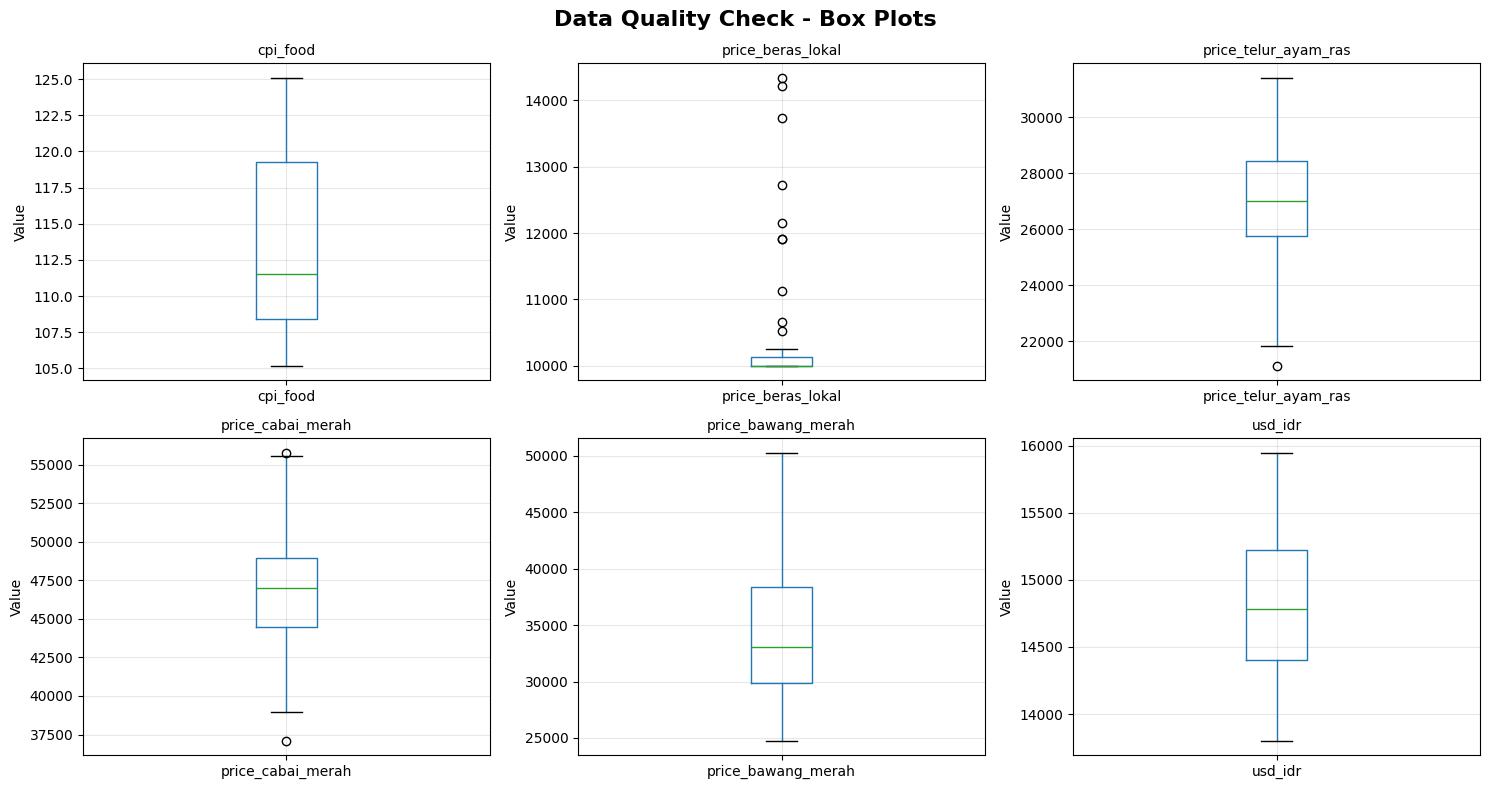

Box plots saved to reports/figures/data_quality_check.png


In [38]:
import matplotlib.pyplot as plt

# Create output directory if not exists
import os
os.makedirs('../reports/figures', exist_ok=True)

# Quick visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Data Quality Check - Box Plots', fontsize=16, fontweight='bold')

# Plot each variable
columns_to_plot = [col for col in modeling_data_final.columns if col != 'date']

for idx, col in enumerate(columns_to_plot):
    if idx < 6:
        row = idx // 3
        col_idx = idx % 3
        
        ax = axes[row, col_idx]
        modeling_data_final.boxplot(column=col, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_ylabel('Value')
        ax.grid(True, alpha=0.3)

# Remove empty subplots if less than 6 columns
for idx in range(len(columns_to_plot), 6):
    row = idx // 3
    col_idx = idx % 3
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.savefig('../reports/figures/data_quality_check.png', dpi=100, bbox_inches='tight')
plt.show()

print("Box plots saved to reports/figures/data_quality_check.png")

In [39]:
output_path = '../data/processed/modeling_dataset.csv'
modeling_data_final.to_csv(output_path, index=False)

print(f"Dataset saved successfully!")
print(f"Path: {output_path}")
print(f"Shape: {modeling_data_final.shape}")
print(f"Columns: {list(modeling_data_final.columns)}")
print(f"Size: {modeling_data_final.memory_usage(deep=True).sum() / 1024:.2f} KB")

Dataset saved successfully!
Path: ../data/processed/modeling_dataset.csv
Shape: (48, 7)
Columns: ['date', 'cpi_food', 'price_beras_lokal', 'price_telur_ayam_ras', 'price_cabai_merah', 'price_bawang_merah', 'usd_idr']
Size: 2.75 KB


In [41]:
# ============================================================
# CELL 21: Final Validation
# ============================================================
print("=== FINAL VALIDATION ===")
print(f"Total rows: {len(modeling_data_final)}")
print(f"Expected months (2020-2023): 48")
print(f"Coverage: {len(modeling_data_final)/48*100:.1f}%")

print("\n=== COLUMN DATA COMPLETENESS ===")
for col in modeling_data_final.columns:
    if col != 'date':
        missing_count = modeling_data_final[col].isnull().sum()
        non_null_count = modeling_data_final[col].count()
        if missing_count > 0:
            print(f"⚠️  {col}: {non_null_count}/{len(modeling_data_final)} ({non_null_count/len(modeling_data_final)*100:.1f}%)")
        else:
            print(f"{col}: Complete ({non_null_count}/{len(modeling_data_final)})")

print("\nData cleaning and alignment completed!")
print("Next step: Run 02_exploratory_data_analysis.ipynb")

=== FINAL VALIDATION ===
Total rows: 48
Expected months (2020-2023): 48
Coverage: 100.0%

=== COLUMN DATA COMPLETENESS ===
cpi_food: Complete (48/48)
price_beras_lokal: Complete (48/48)
price_telur_ayam_ras: Complete (48/48)
price_cabai_merah: Complete (48/48)
price_bawang_merah: Complete (48/48)
usd_idr: Complete (48/48)

Data cleaning and alignment completed!
Next step: Run 02_exploratory_data_analysis.ipynb
